Các bước chuẩn bị đầu tiên

In [1]:
#Import thư viện
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Duyệt qua tất cả các tệp trong một thư mục và in đường dẫn đầy đủ của mỗi tệp
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# **London weather prediction (1979 - 2021)**
Với bộ dữ liệu đầu vào, xây dựng mô hình hồi quy dự đoán nhiệt độ trung bình tại thành phố London

Cụ thể: Mô hình hồi quy dự đoán nhiệt độ trung bình của thành phố London bằng cách sử dụng nhiều tham số khác nhau, bao gồm nhiệt độ, độ ẩm, lượng mưa, tốc độ gió, v.v.


Input: Data Kaggle 

Output: Mô hình hồi quy dự đoán nhiệt độ trung bình thành phố London

#######################################################################################################################################################################

# **Import các thư viện cần thiết**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from joblib import dump
from joblib import load

# **Đọc dữ liệu**

Dữ liệu được tải xuống từ link Kaggle: https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data/data

In [3]:

df = pd.read_csv("C:/Users/DELL/Downloads/archive (1)/london_weather.csv")

Hiển thị danh sách các cột của dữ liệu

In [4]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')


# Đặt cột 'Date' làm Datetime Index
df.set_index('date', inplace=True)

# Kiểm tra lại thông tin của DataFrame
print(df.info())

# Xem các dòng đầu tiên của DataFrame
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1979-01-01 to 2020-12-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       15322 non-null  float64
 1   sunshine          15341 non-null  float64
 2   global_radiation  15322 non-null  float64
 3   max_temp          15335 non-null  float64
 4   mean_temp         15305 non-null  float64
 5   min_temp          15339 non-null  float64
 6   precipitation     15335 non-null  float64
 7   pressure          15337 non-null  float64
 8   snow_depth        13900 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None
            cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
date                                                                       
1979-01-01          2.0       7.0              52.0       2.3       -4.1   
1979-01-02          6.0       1.7              27.0       1.6       -2.6   
1979-01-0

# **Understanding of dataset**
Báo cáo Đánh giá Khí hậu Châu Âu đã đưa ra bộ dữ liệu các đo lường từ các thuộc tính thời tiết được sử dụng để tạo ra dữ liệu thời tiết London (ECA). Các đo lường được sử dụng để tạo ra bộ dữ liệu cụ thể này được lấy từ một trạm khí tượng gần sân bay Heathrow ở London, Vương quốc Anh. Nó có những đặc điểm sau đây:

date - Ngày ghi nhận đo lường - (int)

cloud_cover - đo độ bao phủ mây, đơn vị oktas - (float)

sunshine - thời gian chiếu sáng, giờ (hrs) - (float)

global_radiation - độ chiếu sáng, Watt per square meter (W/m2) - (float)

max_temp - nhiệt độ cao nhất ghi nhận được, độ Celsius (°C) - (float)

mean_temp - nhiệt độ trung bình degrees Celsius (°C) - (float)

min_temp - nhiệt độ thấp nhất ghi nhận được, degrees Celsius (°C) - (float)

precipitation - lượng mưa đo được, millimeters (mm) - (float)

pressure - áp suất đo được, Pascals (Pa) - (float)

snow_depth - độ dày tuyết, centimeters (cm) - (float)


# **Tiền xử lý dữ liệu**

In [6]:
df.head(15)

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
1979-01-06,5.0,3.8,39.0,8.3,-0.5,-6.6,0.7,102780.0,1.0
1979-01-07,8.0,0.0,13.0,8.5,1.5,-5.3,5.2,102520.0,0.0
1979-01-08,8.0,0.1,15.0,5.8,6.9,5.3,0.8,101870.0,0.0
1979-01-09,4.0,5.8,50.0,5.2,3.7,1.6,7.2,101170.0,0.0


# **Thống kê dữ liệu mẫu**

Một số đặc trưng của bộ dữ liệu

In [7]:
print(df.describe())

        cloud_cover      sunshine  global_radiation      max_temp  \
count  15322.000000  15341.000000      15322.000000  15335.000000   
mean       5.268242      4.350238        118.756951     15.388777   
std        2.070072      4.028339         88.898272      6.554754   
min        0.000000      0.000000          8.000000     -6.200000   
25%        4.000000      0.500000         41.000000     10.500000   
50%        6.000000      3.500000         95.000000     15.000000   
75%        7.000000      7.200000        186.000000     20.300000   
max        9.000000     16.000000        402.000000     37.900000   

          mean_temp      min_temp  precipitation       pressure    snow_depth  
count  15305.000000  15339.000000   15335.000000   15337.000000  13900.000000  
mean      11.475511      7.559867       1.668634  101536.605594      0.037986  
std        5.729709      5.326756       3.738540    1049.722604      0.545633  
min       -7.600000    -11.800000       0.000000   95960.0

Tương quan giữa biến "mean_temp" với các biến còn lại

In [8]:
correlations = df.corr().loc['mean_temp', :]
print(correlations)

cloud_cover        -0.110556
sunshine            0.396535
global_radiation    0.635432
max_temp            0.912200
mean_temp           1.000000
min_temp            0.955593
precipitation      -0.010462
pressure            0.004764
snow_depth         -0.154945
Name: mean_temp, dtype: float64


Nhiệt độ trung bình (mean_temp) có mối tương quan mạnh với nhiệt độ cao nhất và thấp nhất trong ngày (max_temp và min_temp).

Các yếu tố như bức xạ toàn cầu, ánh sáng mặt trời, độ che phủ mây và độ dày tuyết đều có mối liên hệ với nhiệt độ trung bình, mặc dù mức độ ảnh hưởng có thể khác nhau.

Lượng mưa và áp suất không khí không có tương quan đáng kể với nhiệt độ trung bình trong bộ dữ liệu này.

Trực quan hóa các mối quan hệ giữa các biến


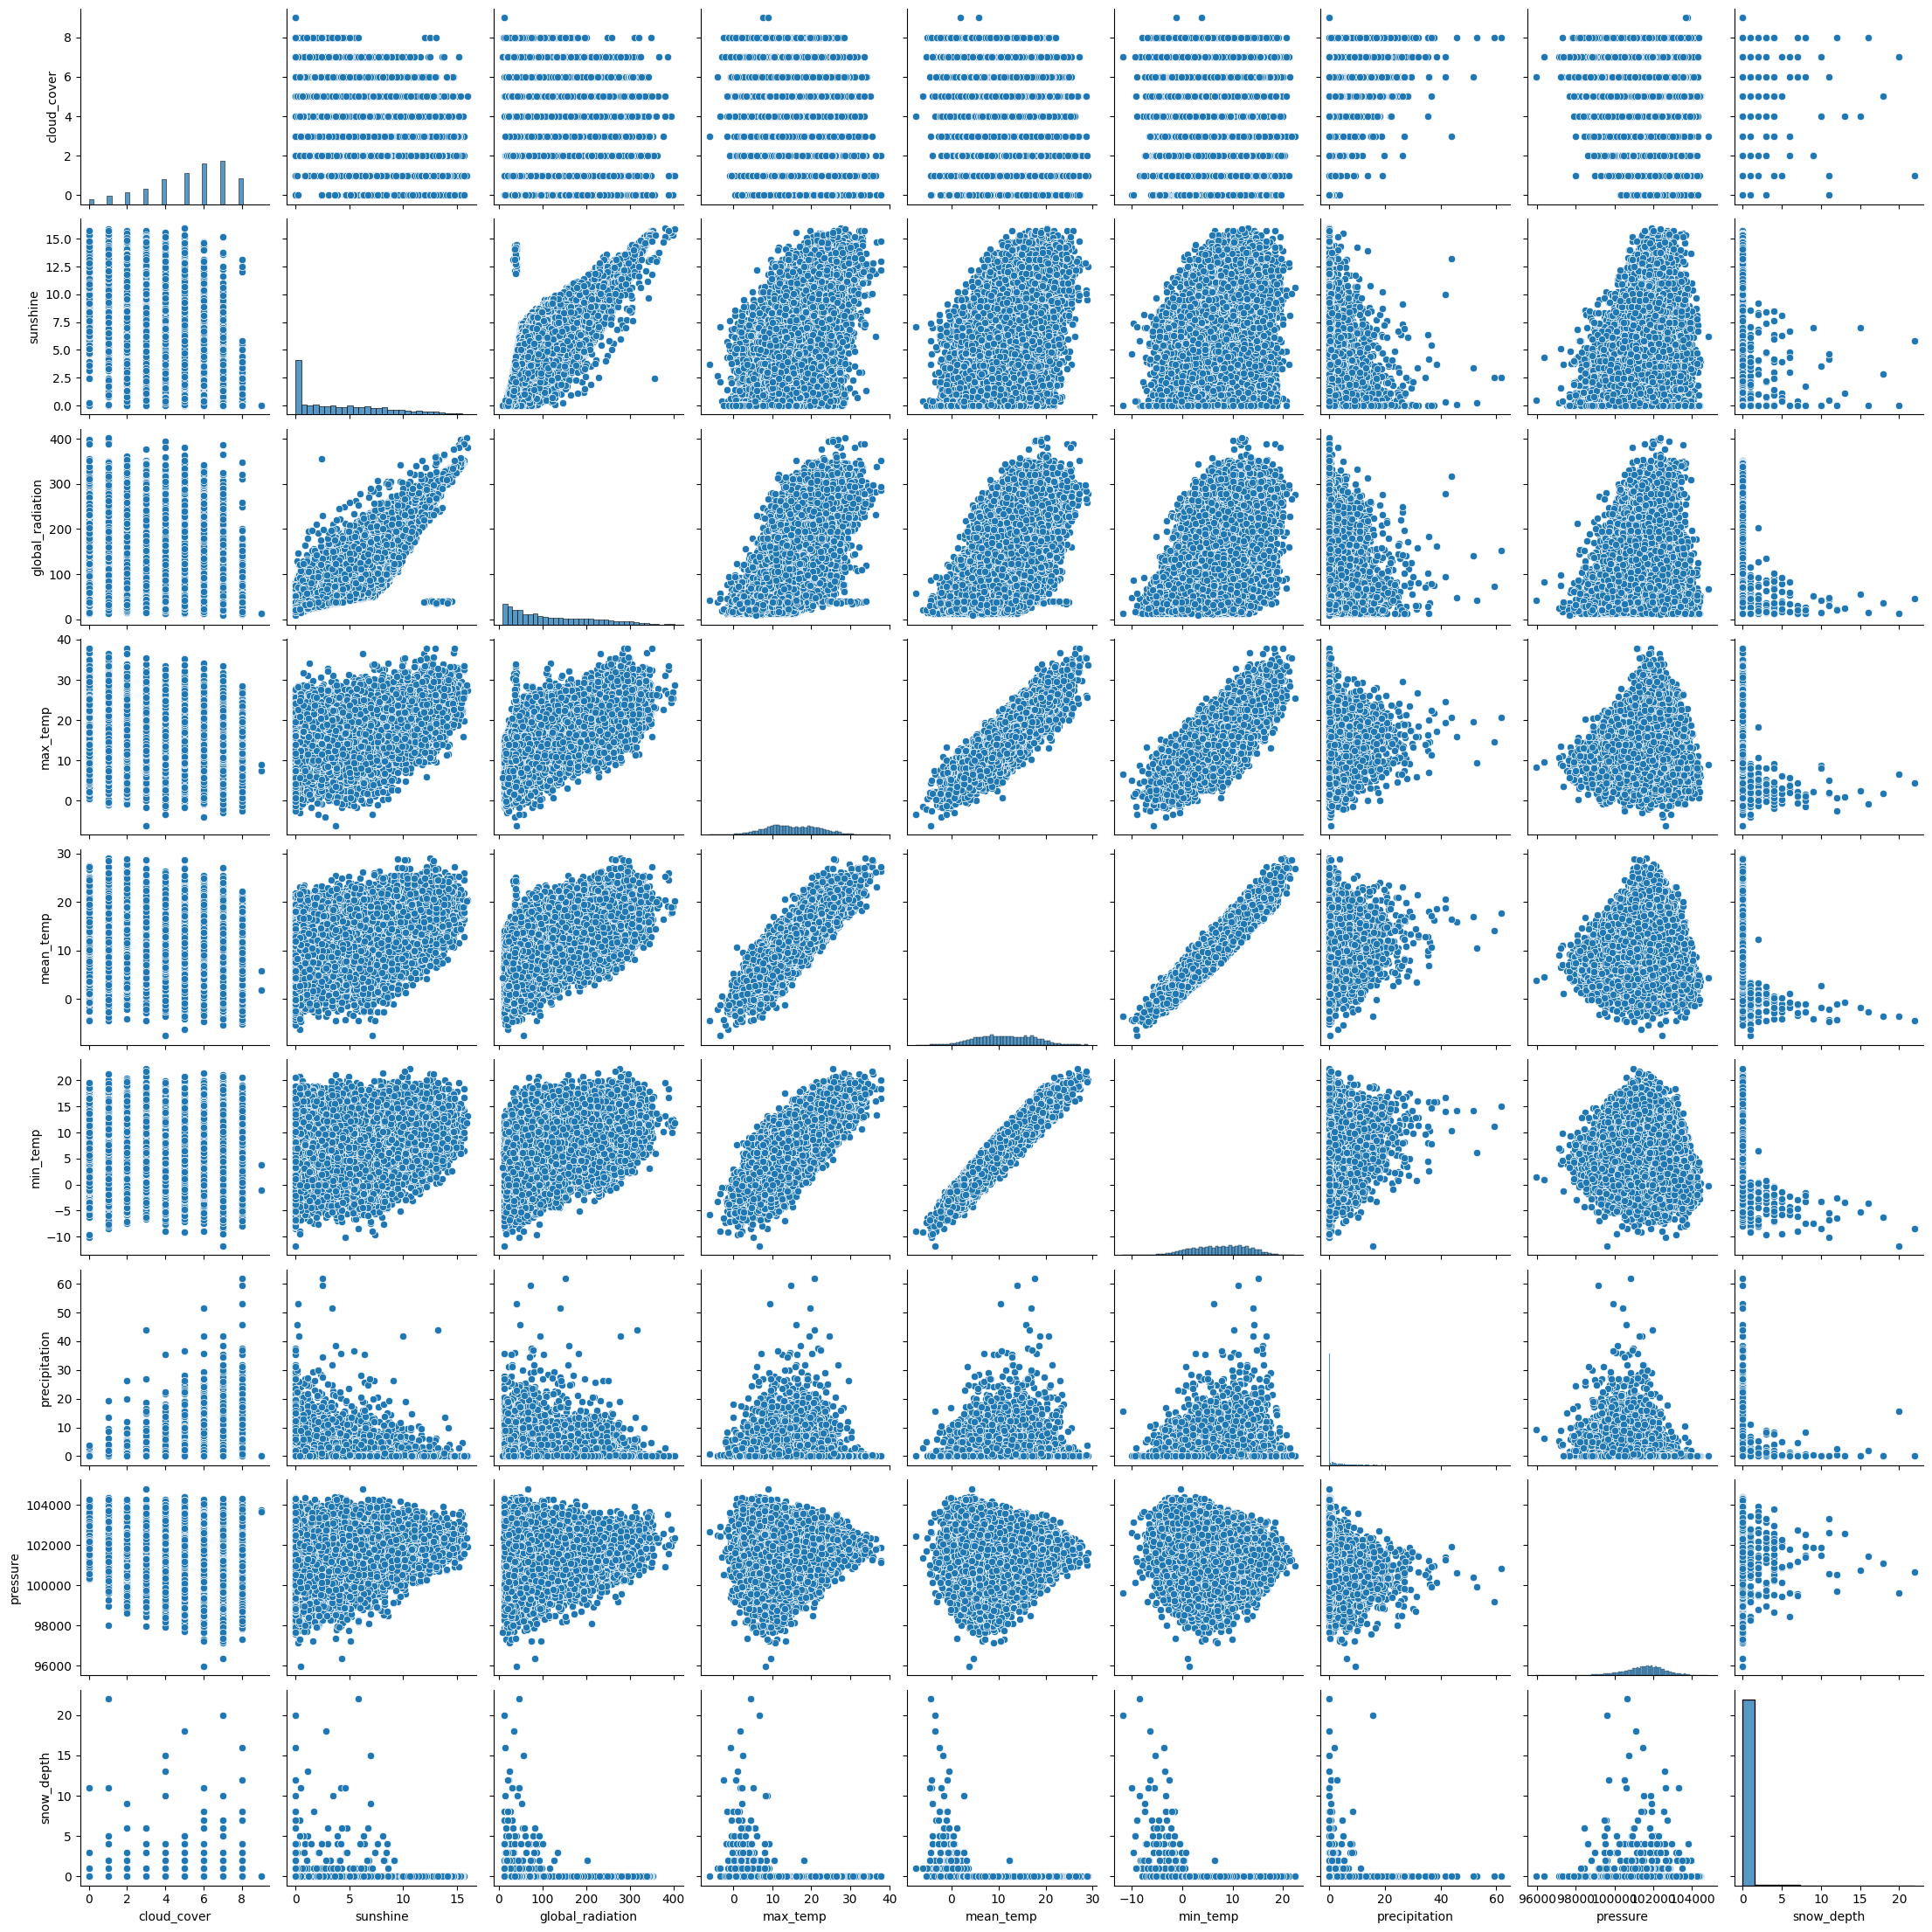

In [9]:
sns.pairplot(df)

Biểu đồ tương quan bằng Heat map

Target Variable - mean_temp

Mục tiêu là xác định các biến có tương quan lớn để dự đoán nhiệt độ trung bình.


<Axes: >

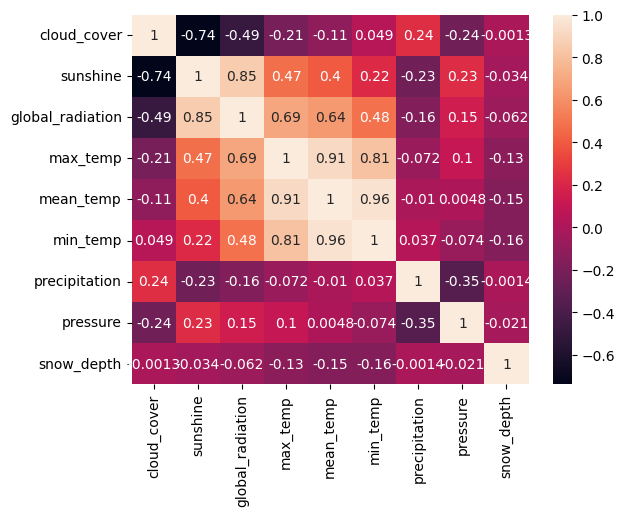

In [10]:
sns.heatmap(df.corr(), annot=True)

Biểu diễn một số đặc tính

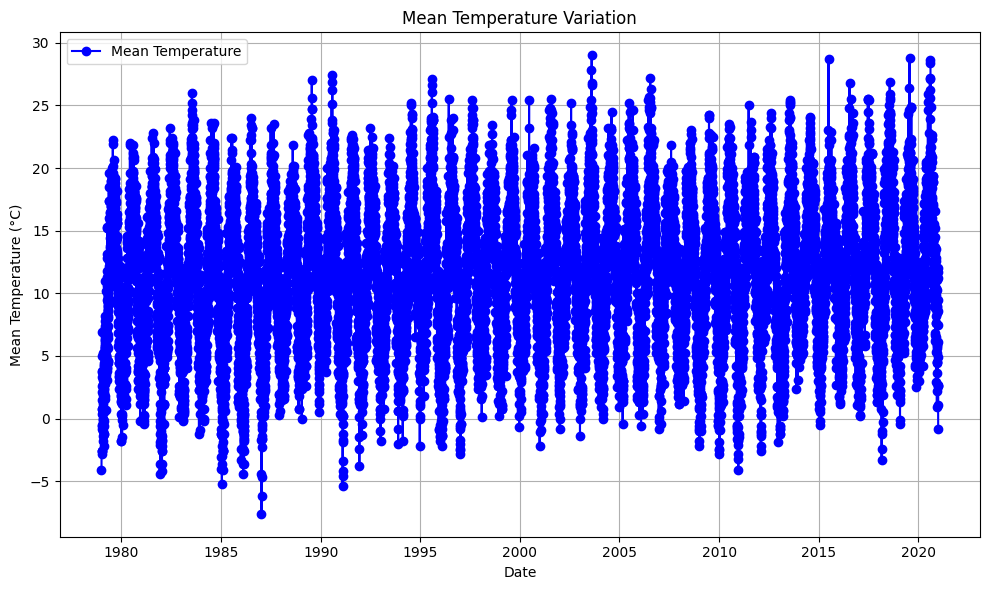

In [11]:
import matplotlib.pyplot as plt

# Biểu diễn nhiệt độ trung bình theo thời gian khi 'date' là index
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['mean_temp'], marker='o', linestyle='-', color='b', label='Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Temperature Variation')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Đảm bảo đồ thị không bị cắt bớt khi hiển thị
plt.show()


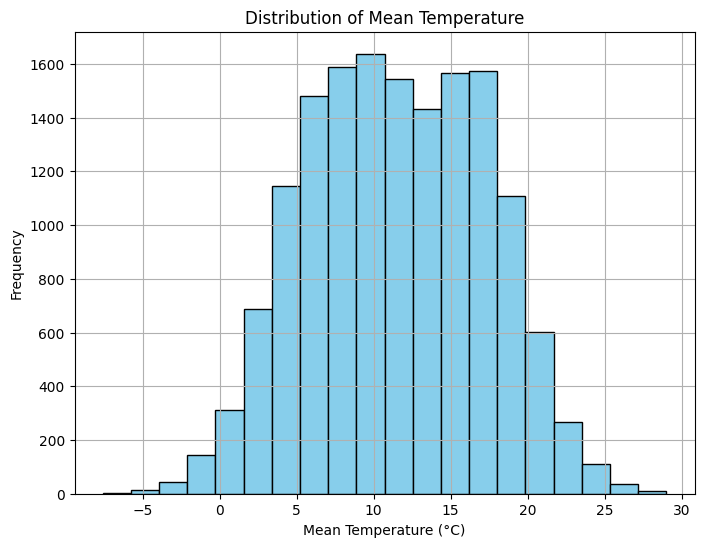

In [12]:
#Phân phối của nhiệt độ trung bình

plt.figure(figsize=(8, 6))
plt.hist(df['mean_temp'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Temperature')
plt.grid(True)
plt.show()


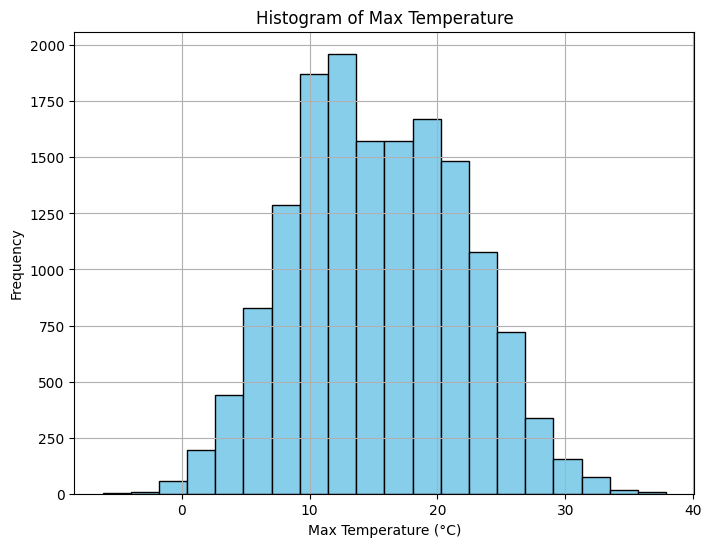

In [13]:
plt.figure(figsize=(8, 6))  # Đặt kích thước của biểu đồ
plt.hist(df['max_temp'], bins=20, color='skyblue', edgecolor='black')  # Vẽ histogram
plt.title('Histogram of Max Temperature')  # Đặt tiêu đề cho biểu đồ
plt.xlabel('Max Temperature (°C)')  # Đặt nhãn cho trục x
plt.ylabel('Frequency')  # Đặt nhãn cho trục y
plt.grid(True)  # Hiển thị lưới đồ thị
plt.show()  # Hiển thị biểu đồ

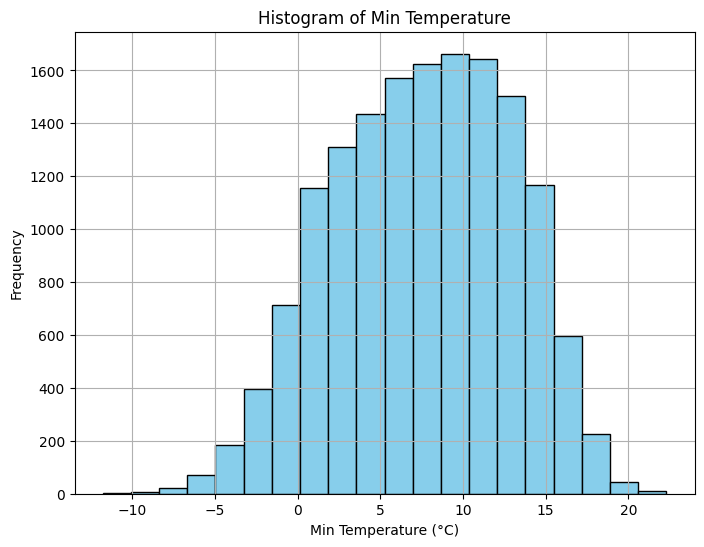

In [14]:
plt.figure(figsize=(8, 6))  # Đặt kích thước của biểu đồ
plt.hist(df['min_temp'], bins=20, color='skyblue', edgecolor='black')  # Vẽ histogram
plt.title('Histogram of Min Temperature')  # Đặt tiêu đề cho biểu đồ
plt.xlabel('Min Temperature (°C)')  # Đặt nhãn cho trục x
plt.ylabel('Frequency')  # Đặt nhãn cho trục y
plt.grid(True)  # Hiển thị lưới đồ thị
plt.show()  # Hiển thị biểu đồ

# ****Tiền xử lý dữ liệu****

Kiểm tra null



In [15]:
df.isnull().sum()

cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

Điền các giá trị bị mising vào DataFrame bằng giá trị trung bình của từng cột

In [16]:
imputer = SimpleImputer(strategy='mean')
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [17]:
#Kiểm tra lại
df_filled.head(15)

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,2.000000,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,6.000000,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,5.000000,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,8.000000,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,6.000000,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
5,5.000000,3.8,39.0,8.3,-0.5,-6.6,0.7,102780.0,1.0
6,8.000000,0.0,13.0,8.5,1.5,-5.3,5.2,102520.0,0.0
7,8.000000,0.1,15.0,5.8,6.9,5.3,0.8,101870.0,0.0
8,4.000000,5.8,50.0,5.2,3.7,1.6,7.2,101170.0,0.0
9,7.000000,1.9,30.0,4.9,3.3,1.4,2.1,98700.0,0.0


###########################################################################################################################################################

# **Tạo và luyện mô hình**

# **Đánh nhãn dữ liệu**

Chọn cột mục tiêu là cột "mean_temp" như đề bài yêu cầu dự đoán

In [18]:
tr = df_filled["mean_temp"]

Feature Selection

Do mối tương quan giữa biến 'date' và biến mục tiêu 'mean_temp' cực kì thấp, không có giá trị trong việc dự báo, nên được đưa thành cột Index.

Vậy feature sẽ còn 8 biến còn lại (kết quả của việc loại bỏ biến 'date' và biến mục tiêu 'mean_temp')



In [19]:
ft = df_filled.drop(["mean_temp"],axis=1)

In [20]:
ft.head()

,cloud_cover,sunshine,global_radiation,max_temp,min_temp,precipitation,pressure,snow_depth
0,2.0,7.0,52.0,2.3,-7.5,0.4,101900.0,9.0
1,6.0,1.7,27.0,1.6,-7.5,0.0,102530.0,8.0
2,5.0,0.0,13.0,1.3,-7.2,0.0,102050.0,4.0
3,8.0,0.0,13.0,-0.3,-6.5,0.0,100840.0,2.0
4,6.0,2.0,29.0,5.6,-1.4,0.0,102250.0,1.0


# **Train and Test Split:**

Chia bộ dữ liệu làm 2 phần là train (luyện) và test (kiểm tra)

Train set chiếm 0.7, test set chiếm 0.3 bộ dữ liệu.


In [21]:
ft_train, ft_test, tr_train, tr_test = train_test_split(ft, tr, test_size=0.3)

In [22]:
ft_train

,cloud_cover,sunshine,global_radiation,max_temp,min_temp,precipitation,pressure,snow_depth
5891,3.0,6.8,91.0,10.8,4.2,0.0,100280.0,0.000000
12206,7.0,1.6,136.0,12.7,12.4,4.8,101440.0,0.000000
13933,7.0,3.3,71.0,9.8,8.8,0.0,99840.0,0.000000
12941,4.0,5.6,213.0,24.5,15.0,2.4,101200.0,0.000000
11497,2.0,8.9,264.0,27.8,13.2,0.0,101930.0,0.037986
...,...,...,...,...,...,...,...,...
3308,5.0,2.3,38.0,11.1,0.9,0.2,100350.0,0.000000
2616,8.0,0.0,35.0,4.7,-2.4,0.5,101490.0,2.000000
3667,7.0,0.0,15.0,10.3,5.8,0.0,103490.0,0.000000
8729,7.0,0.2,19.0,12.8,4.8,0.0,100540.0,0.000000


In [23]:
ft_test

,cloud_cover,sunshine,global_radiation,max_temp,min_temp,precipitation,pressure,snow_depth
3376,7.0,1.2,86.0,12.2,5.3,0.0,100020.0,0.0
14723,7.0,2.3,128.0,17.3,10.1,0.6,99380.0,0.0
5626,7.0,0.9,116.0,16.8,7.4,0.0,102130.0,0.0
12984,3.0,3.7,174.0,26.9,17.5,0.0,101030.0,0.0
3412,3.0,10.9,267.0,20.3,6.6,0.0,101390.0,0.0
...,...,...,...,...,...,...,...,...
5351,5.0,3.9,148.0,18.4,8.4,0.0,102200.0,0.0
7537,1.0,13.5,274.0,19.3,9.7,0.0,102530.0,0.0
11757,5.0,3.6,100.0,13.4,4.2,0.0,101450.0,0.0
2928,2.0,3.1,36.0,0.1,-1.4,0.0,103000.0,0.0


In [24]:
tr_train

5891      7.2
12206    16.0
13933    10.0
12941    18.7
11497    19.8
         ... 
3308      2.8
2616     -1.3
3667      8.4
8729      6.8
4255     21.8
Name: mean_temp, Length: 10738, dtype: float64

In [25]:
tr_test

3376      7.5
14723    14.2
5626      9.9
12984    22.2
3412     11.8
         ... 
5351     13.4
7537     14.4
11757     8.3
2928      1.5
1936     12.7
Name: mean_temp, Length: 4603, dtype: float64

dataframe ft_train = dataframe of train data

dataframe tr_train = dataframe of train target

dataframe ft_test = dataframe of test data

dataframe tr_test = dataframe of test target

# ****Mô hình****


# ****1. ADAboost Regression****

Lý do lựa chon ADABoosting Regression

- Kết Hợp Mô Hình Yếu: ADABoost kết hợp nhiều mô hình yếu, như các cây quyết định, để tạo thành một mô hình mạnh. Điều này giúp cải thiện độ chính xác trong việc dự đoán các thông số thời tiết, như nhiệt độ, độ ẩm, lượng mưa và tốc độ gió.

- Xử Lý Phi Tuyến Tính: Dữ liệu thời tiết thường có các mối quan hệ phi tuyến tính phức tạp giữa các biến đầu vào. ADABoost có khả năng xử lý tốt các mối quan hệ này, giúp mô hình dự đoán chính xác hơn.

- Giảm độ lệch và Phương Sai: Bằng cách tập trung vào các mẫu bị phân loại sai trong từng vòng lặp huấn luyện, ADABoost giảm cả độ lệch và phương sai, giúp mô hình tổng quát hóa tốt hơn trên dữ liệu mới.

Thuật toán ADABoosting
1. Khởi tạo trọng số quan sát $w_i = \frac{1}{N}, \forall i = 1, N.$

2. Lặp lại quá trình huấn luyện chuỗi mô hình ở mỗi bước $b, b = 1, 2, \ldots, B$ gồm các bước con:

    a. Khớp mô hình $\hat{f}^b$ cho tập huấn luyện sử dụng trọng số $w_i$ cho mỗi quan sát $(x_i, y_i)$.
    
    b. Tính sai số huấn luyện:

    $$
    r_b = \frac{\sum_{i=1}^{N} w_i 1(y_i \ne \hat{f}^b(x_i))}{\sum_{i=1}^{N} w_i}
    $$

    Ở đây $1(y_i \ne \hat{f}^b(x_i))$ chính là những quan sát bị dự báo sai ở mô hình thứ $b$. Giá trị $r_b \in [0, 1]$.
    
    c. Tính trọng số quyết định cho từng mô hình:
    $$
    \alpha_b = \log \left( \frac{1 - r_b}{r_b} \right)
    $$
    
    d. Cập nhật trọng số cho từng quan sát:
    $$
    w_i := w_i \exp[\alpha_b 1(y_i \ne \hat{f}^b(x_i))]
    $$
    với $\forall i = 1, N$. Như vậy ta có thể nhận thấy rằng:
    $$
    w_i := \begin{cases} 
    w_i & \text{if } y_i = \hat{f}^b(x_i) \\
    w_i \exp(\alpha_b) & \text{if } y_i \ne \hat{f}^b(x_i)
    \end{cases}
    $$
    Sau khi tính xong các trọng số $w_i$ thì giá trị của chúng sẽ được chuẩn hóa bằng cách chia cho tổng $\sum_{i=1}^{N} w_i$.

3. Cập nhật dự báo cuối cùng:
$$
\hat{f}(x) = \text{sign} \left( \sum_{i=1}^{p} \alpha_i f^i(x) \right)
$$

Trọng số $\alpha_i$ được tính ở bước thứ $2$ thể hiện vai trò quan trọng trong việc ra quyết định của mô hình thứ $i$. Giá trị này được tính theo một hàm nghịch biến với sai số của mô hình. 

Điều kiện dừng:

Điều kiện dừng cho mô hình ADABoost Regression được quyết định bởi Số Lượng Bộ Lặp (Iterations): Số lượng tối đa các bộ lặp hay số lượng mô hình yếu. 

Trong AdaBoostRegressor, tham số này được thiết lập bằng n_estimators. Khi mô hình đạt đến số lượng bộ lặp tối đa, quá trình huấn luyện sẽ dừng lại.

In [26]:
regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=123)
regr.fit(ft_train, tr_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=300, random_state=123)

Các tham số của mô hình AdaBoostRegressor là:

- DecisionTreeRegressor(max_depth=4): DecisionTreeRegressor là một loại mô hình hồi quy dựa trên cây quyết định, trong đó cây được sử dụng để phân loại dữ liệu dựa trên các đặc trưng của chúng.
max_depth=4 là tham số của DecisionTreeRegressor, xác định độ sâu tối đa của cây quyết định. Điều này giúp kiểm soát độ phức tạp của mô hình, tránh tình trạng quá khớp (overfitting) và giảm thiểu sai số dự đoán.
n_estimators=300:

- n_estimators: Là số lượng các cây quyết định mà mô hình AdaBoostRegressor sẽ sử dụng trong quá trình huấn luyện. Mỗi cây được huấn luyện tuần tự dựa trên các trọng số của các mẫu dữ liệu trước đó, với mục tiêu là cải thiện kết quả dự đoán.
random_state=123:

- random_state: Là tham số quan trọng để xác định seed cho việc tạo số ngẫu nhiên trong quá trình huấn luyện. Khi sử dụng cùng một giá trị random_state, mỗi lần huấn luyện sẽ đảm bảo mô hình được huấn luyện với các điều kiện ngẫu nhiên tương tự, giúp đảm bảo kết quả có thể tái lặp được.

In [27]:
y_pred = regr.predict(ft_test)
mse1 = mean_squared_error(tr_test, y_pred)
print("Mean Squared Error:", mse1)
print("Median absolute error =", round(sm.median_absolute_error(tr_test, y_pred), 2))
print("Mean absolute error =", round(sm.mean_absolute_error(tr_test, y_pred), 2)) 
print("Test set R2: {:.3f} ".format(regr.score(ft_test, tr_test)))
r2 = regr.score(ft_test, tr_test)
print("R-squared:", r2)

Mean Squared Error: 1.297203954972326
Median absolute error = 0.72
Mean absolute error = 0.88
Test set R2: 0.960 
R-squared: 0.9596763435574412


Điều chỉnh tham số 1

In [28]:
regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=250, random_state=100)
regr.fit(ft_train, tr_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5),
                  n_estimators=250, random_state=100)

In [29]:
y_pred = regr.predict(ft_test)
mse1 = mean_squared_error(tr_test, y_pred)
print("Mean Squared Error:", mse1)
print("Median absolute error =", round(sm.median_absolute_error(tr_test, y_pred), 2))
print("Mean absolute error =", round(sm.mean_absolute_error(tr_test, y_pred), 2)) 
print("Test set R2: {:.3f} ".format(regr.score(ft_test, tr_test)))
r2 = regr.score(ft_test, tr_test)
print("R-squared:", r2)

Mean Squared Error: 1.0294014735786003
Median absolute error = 0.65
Mean absolute error = 0.78
Test set R2: 0.968 
R-squared: 0.9680009984529128


Điều chỉnh tham số 2


In [30]:
regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6), n_estimators=300, random_state=120)
regr.fit(ft_train, tr_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=6),
                  n_estimators=300, random_state=120)

# **Đánh giá mô hình**

Thiết bị luyện mô hình: LENOVO IdeaPad Pro 5 2023 i5 13500H - Ram 16GB - GPU GeForce RTX 3050 6GB

Thời gian luyện mô hình:
- Lần 1: 1.9s
- Lần 2: 2.0s
- Lần 3: 2.8s

Thời gian tương đối nhanh do bộ dữ liệu nhỏ và đơn giản.

In [31]:
y_pred = regr.predict(ft_test)
mse1 = mean_squared_error(tr_test, y_pred)
print("Mean Squared Error:", mse1)
print("Median absolute error =", round(sm.median_absolute_error(tr_test, y_pred), 2))
print("Mean absolute error =", round(sm.mean_absolute_error(tr_test, y_pred), 2)) 
print("Test set R2: {:.3f} ".format(regr.score(ft_test, tr_test)))
r2 = regr.score(ft_test, tr_test)
print("R-squared:", r2)

Mean Squared Error: 0.9870765013020943
Median absolute error = 0.63
Mean absolute error = 0.76
Test set R2: 0.969 
R-squared: 0.9693166725490923


Giải thích các giá trị đánh giá mô hình:

- Mean Squared Error (MSE): 0.9268

    MSE là trung bình của bình phương sai số giữa giá trị thực tế và giá trị dự đoán. Giá trị thấp cho thấy mô hình dự đoán chính xác hơn.

- Median Absolute Error: 0.62

    Đây là trung vị của các sai số tuyệt đối. Giá trị nhỏ hơn cho thấy hầu hết các dự đoán gần với giá trị thực tế.

- Mean Absolute Error (MAE): 0.74

    MAE là trung bình của các sai số tuyệt đối. Giá trị thấp cho thấy dự đoán của mô hình gần với giá trị thực tế hơn.

- Test set R²: 0.972

    R² đo lường tỷ lệ biến thiên của dữ liệu được mô hình giải thích. Giá trị 0.970 nghĩa là mô hình giải thích được 97.0% biến thiên của dữ liệu, cho thấy hiệu suất rất tốt.

- R-squared: 0.9719

    Đây là một giá trị R² khác, cũng rất cao, cho thấy mô hình có khả năng khái quát hóa tốt.
    
Tóm lại, các chỉ số này cho thấy mô hình AdaBoost Regressor của bạn hoạt động rất tốt, dự đoán chính xác và giải thích phần lớn biến thiên của dữ liệu.

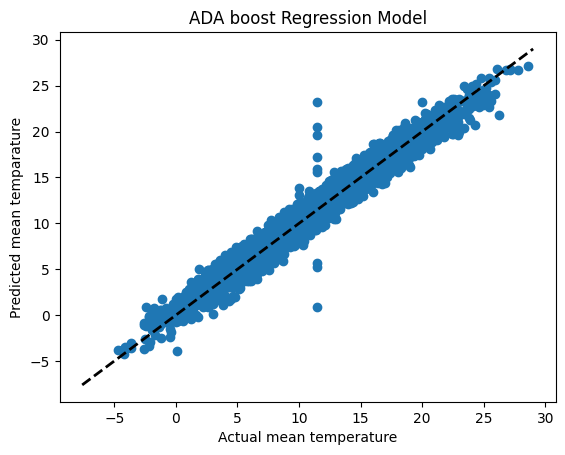

In [32]:
plt.scatter(tr_test, y_pred)
plt.plot([tr.min(), tr.max()], [tr.min(), tr.max()], 'k--', lw=2)
plt.xlabel('Actual mean temperature')
plt.ylabel('Predicted mean temparature')
plt.title('ADA boost Regression Model')
plt.show()

# **So sánh với mô hình XGBoost Regression**

Thuật toán XGBoost Regression:

1. Khởi Tạo Mô Hình: Khởi tạo với một giá trị dự đoán ban đầu, thường là trung bình của các giá trị mục tiêu.

$$
            F_0(x) = \text{mean}(y)
$$

2. Lặp Qua Các Bộ Lặp (Iterations):

a. Tính Toán Phần Dư (Residuals): Tại mỗi bước $m$, tính toán phần dư (residuals), tức là sự chênh lệch giữa giá trị thực tế và giá trị dự đoán hiện tại.
    
$$
            r_m = y_i - F_{m-1}(x_i)
$$

b. Huấn Luyện Mô Hình Yếu (Weak Learners): Huấn luyện một cây quyết định h_m để dự đoán phần dư.

c. Cập Nhật Dự Đoán: Cập nhật mô hình hiện tại bằng cách thêm mô hình yếu mới vào, có điều chỉnh bởi hệ số học (learning rate) $\eta$


$$
            F_m(x) = F_{m-1}(x) + \eta h_m(x)
$$

3. Tối Ưu Hóa Hàm Mục Tiêu:
Hàm mục tiêu tổng thể bao gồm hai phần: hàm mất mát 𝐿 và thành phần chính quy $\Omega$.

$$
\mathcal{L}(F) = \frac{1}{N} \sum_{i=1}^N L(y_i, F(x_i)) + \lambda \Omega(h_m)
$$

In [33]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(ft_train, tr_train)

xg_pred = xg_reg.predict(ft_test)

# Tính toán các chỉ số đánh giá
print("Mean absolute error =", round(sm.mean_absolute_error(tr_test, xg_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(tr_test, xg_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(tr_test, xg_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(tr_test, xg_pred), 2)) 
print("R2 score =", round(sm.r2_score(tr_test, xg_pred), 2))



Mean absolute error = 3.29
Mean squared error = 15.85
Median absolute error = 3.02
Explain variance score = 0.51
R2 score = 0.51


Các chỉ số đánh giá mô hình XGBoost Regression:

- Mean Absolute Error (MAE): 3.33
(Trung bình giá trị tuyệt đối của sai số giữa dự đoán và giá trị thực tế).

- Mean Squared Error (MSE): 16.11
(Trung bình bình phương của sai số giữa dự đoán và giá trị thực tế).
- Median Absolute Error: 3.06
(Giá trị trung vị của các giá trị tuyệt đối của sai số).
- Explained Variance Score: 0.51
(Phần trăm sự biến thiên của biến phụ thuộc mô hình giải thích được so với giá trị thực tế).
- R-squared (R2) Score: 0.51
(Mức độ phù hợp của mô hình so với dữ liệu thực tế, nằm trong khoảng [0, 1])

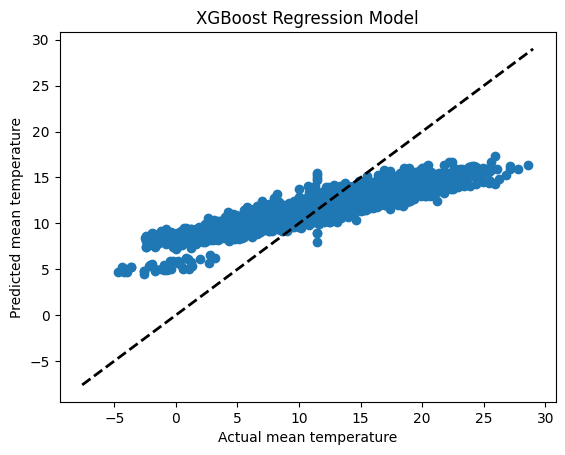

In [34]:
plt.scatter(tr_test, xg_pred)
plt.plot([tr.min(), tr.max()], [tr.min(), tr.max()], 'k--', lw=2)
plt.xlabel('Actual mean temperature')
plt.ylabel('Predicted mean temperature')
plt.title('XGBoost Regression Model')
plt.show()



Với bộ dữ liệu này, mô hình ADABoost Regression tốt hơn hẳn so với XGBoost Regression.

Có thể thấy điều đó từ các chỉ số đánh giá, đặc biệt là với r2 score.

R2 score của ADABoost Regression đạt đến 97% trong khi của XGBoost Regression chỉ đạt 51%.

Vậy kết luận rằng mô hình ADABoost Regression phù hợp hơn với bộ dữ liệu này.

# **Ứng dụng của mô hình**

Xây dựng chương trình Dự đoán nhiệt độ trung bình từ các biến lấy dữ liệu bằng cách nhập từ bàn phím.

In [35]:
# Lưu mô hình vào file
dump(regr, 'adaboost_regressor_model.pkl')

['adaboost_regressor_model.pkl']

In [36]:
# Load trained model from file
regr = load('adaboost_regressor_model.pkl')

def get_user_input():
    features = [
        'cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 
        'min_temp', 'precipitation', 'pressure', 'snow_depth'
    ]
    user_input = []
    
    for feature in features:
        value = float(input(f'Nhập giá trị cho {feature}: '))
        user_input.append(value)
    
    # Create DataFrame from user input
    user_input_df = pd.DataFrame([user_input], columns=features)
    return user_input_df

def predict_mean_temp():
    user_input = get_user_input()
    prediction = regr.predict(user_input)
    print(f'Dự đoán mean_temp: {prediction[0]}')

if __name__ == "__main__":
    predict_mean_temp()

ValueError: could not convert string to float: ''

#####################################################################################################################################################################################################

# **Kết luận**

# **Ưu nhược điểm**

- Ưu điểm: Độ chính xác mô hình cao, rất phù hợp với dữ liệu đã cho, các sai số tương đối thấp.

- Nhược điểm: Chỉ đánh giá được trên các dữ liệu là số, đối với các dữ liệu không phải số thì chưa tìm được cách đưa vào mô hình dự báo, việc điều chỉnh tham số mang tính cảm tính.

# **Hướng phát triển và ứng dụng trong tương lai**
- Tìm hiểu thêm các cách xử lý dữ liệu phi số để đưa vào các mô hình hồi quy vốn chỉ xử lý được các trường dữ liệu là số. Việc này phải tùy vào mỗi bộ dữ liệu có cách xử lý khác nhau sao cho phù hợp.

- Tìm ra phương pháp tính toán tìm ra tham số tối ưu cho mô hình, hiện các tham số được điều chỉnh chỉ mang tính cảm tính.
